### Initial Data Exploration

This code uses data analytics & visualization techniques with Python to examine global asylum (refugee) applicant data from 2000 - 2020. 

We create 3 informative visualizations to display important temporal and geographic trends in the data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

applications_df = pd.read_csv('data/asylum-applications.csv')
decisions_df = pd.read_csv('data/asylum-decisions.csv')

In [4]:
# Examine applications data
applications_df.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),applied
0,2006,Afghanistan,AFG,Australia,AUS,14
1,2006,Albania,ALB,Australia,AUS,21
2,2006,Algeria,DZA,Australia,AUS,5
3,2006,Egypt,EGY,Australia,AUS,38
4,2006,Bahrain,BHR,Australia,AUS,11


In [5]:
# Examine countries where applicants originate from
applications_df["Country of origin"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Egypt', 'Bahrain',
       'Bangladesh', 'Belarus', 'Brazil', 'Bulgaria', 'Cambodia', 'China',
       'Chile', 'Cameroon', 'Colombia', 'Ethiopia', 'Fiji', 'Palestinian',
       'United Kingdom of Great Britain and Northern Ireland', 'Georgia',
       'Germany', 'Ghana', 'India', 'Indonesia', 'Iran (Islamic Rep. of)',
       'Iraq', 'Israel', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Rep. of Korea',
       "Dem. People's Rep. of Korea", 'Lebanon', 'Sri Lanka', 'Lithuania',
       'Latvia', 'Malaysia', 'Mongolia', 'Morocco', 'Myanmar', 'Nepal',
       'Nigeria', 'Pakistan', 'Philippines', 'Papua New Guinea',
       'South Africa', 'Russian Federation',
       'Serbia and Kosovo: S/RES/1244 (1999)', 'Viet Nam', 'Sudan',
       'Syrian Arab Rep.', 'United Rep. of Tanzania', 'Thailand',
       'Timor-Leste', 'Tonga', 'Turkey', 'Uganda', 'Ukraine',
       'Uzbekistan', 'Zimbabwe', 'Unknown ', 'North Macedonia',
       'Singapore', 'Dem. Rep. of the Congo',

In [6]:
# Note that some rows have an "Unknown" country of origin
unknown_country = applications_df.loc[applications_df["Country of origin"] == "Unknown "]
unknown_country.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),applied
59,2006,Unknown,NaN,United Kingdom of Great Britain and Northern I...,GBR,14865
115,2007,Unknown,NaN,United Kingdom of Great Britain and Northern I...,GBR,14055
116,2007,Unknown,NaN,Switzerland,CHE,3984
167,2008,Unknown,NaN,Belgium,BEL,4823
168,2008,Unknown,NaN,Luxembourg,LUX,202


### Data Cleaning

In [7]:
# Data cleaning: remove rows where country of origin is "Unknown"
# Note that data loss is only around 1%, so that is good
applications_clean_df = applications_df[applications_df["Country of origin"] != "Unknown "]
initial = len(applications_df)
final = len(applications_clean_df)
print("Num data observations, initial:", initial)
print("Num data observations, after cleaning:", final)
print("Percentage data loss:", (initial - final) / initial * 100)

Num data observations, initial: 90803
Num data observations, after cleaning: 89891
Percentage data loss: 1.0043721022433179


## Visualization #1: Animated map of asylum applicants by country, 2000 - 2020

In [8]:
# Group by country to see the total number of asylum applicants per country
apps_by_country = applications_clean_df.groupby(["Country of origin", "Year", "Country of origin (ISO)"])["applied"].sum().reset_index()
apps_by_country = apps_by_country.sort_values(by="applied", ascending=False)
apps_by_country.head(20)

,Country of origin,Year,Country of origin (ISO),applied
3653,Venezuela (Bolivarian Republic of),2019,VEN,440793
3262,Syrian Arab Rep.,2015,SYR,416865
3263,Syrian Arab Rep.,2016,SYR,357615
3652,Venezuela (Bolivarian Republic of),2018,VEN,348854
0,Afghanistan,2000,AFG,291277
3497,Ukraine,2014,UKR,289916
15,Afghanistan,2015,AFG,280346
16,Afghanistan,2016,AFG,254554
1652,Iraq,2015,IRQ,215382
1653,Iraq,2016,IRQ,195543


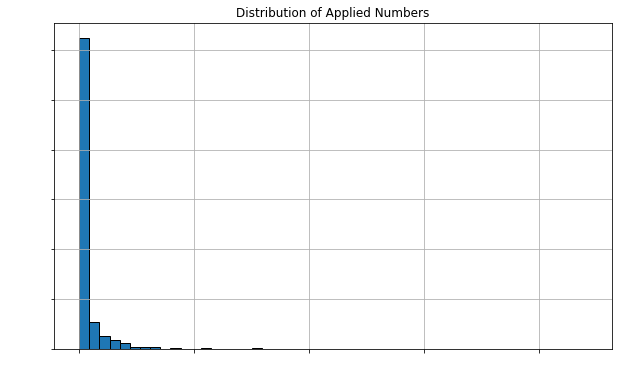

In [9]:
# Plot distribution of number of applicants across countries
plt.figure(figsize=(10, 6))
plt.hist(apps_by_country['applied'], bins=50, edgecolor='black')
plt.title('Distribution of Applied Numbers')
plt.xlabel('Number of Applications', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True)
plt.show()

In [10]:
# Distribution seems quite skewed left
# Examine basic statistics to better understand the distribution
print(f"Mean: {apps_by_country['applied'].mean()}")
print(f"Median: {apps_by_country['applied'].median()}")
print(f"Maximum: {apps_by_country['applied'].max()}")
print(f"Minimum: {apps_by_country['applied'].min()}")

Mean: 6486.53179036978
Median: 654.0
Maximum: 440793
Minimum: 5


In [11]:
# Since data is skewed, use quantile bins for plotting
# Allows us to identify intervals such that each interval has same proportion of data, but ranges are not necessarily linear
quantile_bins = pd.qcut(apps_by_country['applied'], q=5)  # Dividing into 5 quantiles
apps_by_country['quantile_bin'] = quantile_bins
apps_by_country['quantile_bin'].unique()

[(6498.6, 440793.0], (1489.0, 6498.6], (263.0, 1489.0], (40.0, 263.0], (4.999, 40.0]]
Categories (5, interval[float64, right]): [(4.999, 40.0] < (40.0, 263.0] < (263.0, 1489.0] < (1489.0, 6498.6] < (6498.6, 440793.0]]

In [12]:
# Round the quantile bins so the numbers are easy to digest in a visualization
# New quantiles (each has approximately 1/5 of data): 1 - 100 applicants, 101 - 500, 501 - 2000, 2001 - 8000, 8001 - 45000

def set_color_range(row):
    if 1 <= row['applied'] <= 100:
        return '1 - 100'
    elif 101 <= row['applied'] <= 500:
        return '101 - 500'
    elif 501 <= row['applied'] <= 2000:
        return '501 - 2,000'
    elif 2001 <= row['applied'] <= 8000:
        return '2,001 - 8,000'
    elif row['applied'] >= 8000:
        return '8,001 - 441,000'
    else:
        return 'Out of Range'  # Default for any other case

apps_by_country["Number of Asylum Applicants"] = apps_by_country.apply(set_color_range, axis=1)
apps_by_country.drop(columns="quantile_bin", inplace=True)
apps_by_country.head()

,Country of origin,Year,Country of origin (ISO),applied,Number of Asylum Applicants
3653,Venezuela (Bolivarian Republic of),2019,VEN,440793,"8,001 - 441,000"
3262,Syrian Arab Rep.,2015,SYR,416865,"8,001 - 441,000"
3263,Syrian Arab Rep.,2016,SYR,357615,"8,001 - 441,000"
3652,Venezuela (Bolivarian Republic of),2018,VEN,348854,"8,001 - 441,000"
0,Afghanistan,2000,AFG,291277,"8,001 - 441,000"


In [13]:
# Clean up column names and order by year for plotting
apps_by_country.rename(columns={"Country of origin" : "Country of Origin", "applied" : "Asylum Applicants"}, inplace=True)
apps_by_country.sort_values(by="Year", ascending=True, inplace=True)
apps_by_country.reset_index(drop=True, inplace=True)
apps_by_country.head()

,Country of Origin,Year,Country of origin (ISO),Asylum Applicants,Number of Asylum Applicants
0,Turkey,2000,TUR,37015,"8,001 - 441,000"
1,Indonesia,2000,IDN,3188,"2,001 - 8,000"
2,Kazakhstan,2000,KAZ,3173,"2,001 - 8,000"
3,Finland,2000,FIN,5,1 - 100
4,Bhutan,2000,BTN,149,101 - 500


In [15]:
# Define color mapping for the visualization
# Quantiles: 1 - 100, 101 - 500, 501 - 2000, 2001 - 8000, 8001 - 450,000

# Color map source: https://handsondataviz.org/design-choropleth.html
color_map = {
    '1 - 100': '#ebf8fb',
    '101 - 500': '#aecee5',
    '501 - 2,000': '#8b95ca',
    '2,001 - 8,000': '#9151ac',
    '8,001 - 441,000': '#8d0180'
}

# Plot
import plotly.express as px
fig = px.choropleth(apps_by_country,
              locations="Country of origin (ISO)",
              color="Number of Asylum Applicants",
              hover_name="Country of Origin",
              hover_data= {
                  "Asylum Applicants" : True,
                  "Year" : True,
                  "Number of Asylum Applicants" : False,
                  "Country of origin (ISO)" : False
              },
              animation_frame="Year",
              color_discrete_map=color_map,
              category_orders={
                  'Number of Asylum Applicants' : [
                      '1 - 100',
                      '101 - 500',
                      '501 - 2,000',
                      '2,001 - 8,000',
                      '8,001 - 441,000'
                  ]
              },
              height=600
)

# Adjust speed of animation and add custom buttons for play, pause, and stop
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label='Pause',
                    method='animate',
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate', transition=dict(duration=0))]
                ),
            ]
        )
    ]
)

fig.show()

## Visualization #2: 20 highest individual observations, 2000 - 2020

In [17]:
# Clean up column names
incidents = applications_clean_df.copy()
incidents.rename(columns={"Country of origin" : "Country of Origin", "Country of asylum" : "Country of Asylum", "applied" : "Asylum Applicants"}, inplace=True)
incidents.head()

,Year,Country of Origin,Country of origin (ISO),Country of Asylum,Country of asylum (ISO),Asylum Applicants
0,2006,Afghanistan,AFG,Australia,AUS,14
1,2006,Albania,ALB,Australia,AUS,21
2,2006,Algeria,DZA,Australia,AUS,5
3,2006,Egypt,EGY,Australia,AUS,38
4,2006,Bahrain,BHR,Australia,AUS,11


In [18]:
# Add a column for total asylum applicants from a country in a given year
def set_total_apps(row):
    year = row['Year']
    country = row['Country of Origin']
    corresponding_row = apps_by_country[(apps_by_country['Year'] == year) & (apps_by_country['Country of Origin'] == country)]
    return corresponding_row['Asylum Applicants'].iloc[0]

incidents["Total number of asylum applicants from country in year"] = incidents.apply(set_total_apps, axis=1)
incidents.head()

,Year,Country of Origin,Country of origin (ISO),Country of Asylum,Country of asylum (ISO),Asylum Applicants,Total number of asylum applicants from country in year
0,2006,Afghanistan,AFG,Australia,AUS,14,15441
1,2006,Albania,ALB,Australia,AUS,21,2229
2,2006,Algeria,DZA,Australia,AUS,5,4274
3,2006,Egypt,EGY,Australia,AUS,38,2145
4,2006,Bahrain,BHR,Australia,AUS,11,35


In [20]:
# Add column for percentages
# For each observation, find its percentage of total applicants that year
def set_percentage(row):
    dest = row['Asylum Applicants']
    total = row['Total number of asylum applicants from country in year']
    percent = round(dest/total * 100)
    return (f"{percent}%")

incidents["Percentage of total applicants"] = incidents.apply(set_percentage, axis=1)
incidents.head()

,Year,Country of Origin,Country of origin (ISO),Country of Asylum,Country of asylum (ISO),Asylum Applicants,Total number of asylum applicants from country in year,Percentage of total applicants
0,2006,Afghanistan,AFG,Australia,AUS,14,15441,0%
1,2006,Albania,ALB,Australia,AUS,21,2229,1%
2,2006,Algeria,DZA,Australia,AUS,5,4274,0%
3,2006,Egypt,EGY,Australia,AUS,38,2145,2%
4,2006,Bahrain,BHR,Australia,AUS,11,35,31%


In [ ]:
# Plot bubble chart of 20 highest incidents between 2000-2020
topincidents = incidents.sort_values(by="Asylum Applicants", ascending=False).head(20)
fig = px.scatter(topincidents, x='Year', y='Country of Origin',
	         size='Asylum Applicants', color="Country of Asylum",
                 hover_name="Asylum Applicants", hover_data=["Year", "Country of Origin", "Country of Asylum", "Asylum Applicants", "Total number of asylum applicants from country in year", "Percentage of total applicants"], size_max=60)
fig.show()

## Visualization #3: 10 highest origin-destination country pairs, 2000 - 2020

In [24]:
# Create a new column for origin-destination pairs

pairs = applications_clean_df.copy()
def make_pair(row):
  origin = row["Country of origin"]
  dest = row["Country of asylum"]
  return (origin, dest)

pairs["Origin, Destination"] = pairs.apply(make_pair, axis=1)
pairs.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),applied,"Origin, Destination"
0,2006,Afghanistan,AFG,Australia,AUS,14,"(Afghanistan, Australia)"
1,2006,Albania,ALB,Australia,AUS,21,"(Albania, Australia)"
2,2006,Algeria,DZA,Australia,AUS,5,"(Algeria, Australia)"
3,2006,Egypt,EGY,Australia,AUS,38,"(Egypt, Australia)"
4,2006,Bahrain,BHR,Australia,AUS,11,"(Bahrain, Australia)"


In [25]:
# Group by unique origin-destination pairs, and sort by number of applicants for each pair
pairs = pairs.groupby(["Origin, Destination", "Country of origin", "Country of origin (ISO)", "Country of asylum", "Country of asylum (ISO)"])["applied"].sum().reset_index()
pairs = pairs.sort_values(by="applied", ascending=False)
pairs.head(10)

,"Origin, Destination",Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),applied
6491,"(Syrian Arab Rep., Germany)",Syrian Arab Rep.,SYR,Germany,DEU,706895
7598,"(Zimbabwe, South Africa)",Zimbabwe,ZWE,South Africa,ZAF,617935
7350,"(Venezuela (Bolivarian Republic of), Peru)",Venezuela (Bolivarian Republic of),VEN,Peru,PER,537870
7083,"(Ukraine, Russian Federation)",Ukraine,UKR,Russian Federation,RUS,472767
4523,"(Myanmar, Malaysia)",Myanmar,MMR,Malaysia,MYS,333882
101,"(Afghanistan, Turkey)",Afghanistan,AFG,Turkey,TUR,327441
3332,"(Iraq, Germany)",Iraq,IRQ,Germany,DEU,318349
35,"(Afghanistan, Germany)",Afghanistan,AFG,Germany,DEU,301487
5712,"(Serbia and Kosovo: S/RES/1244 (1999), Germany)",Serbia and Kosovo: S/RES/1244 (1999),SRB,Germany,DEU,293237
4340,"(Mexico, United States of America)",Mexico,MEX,United States of America,USA,286965


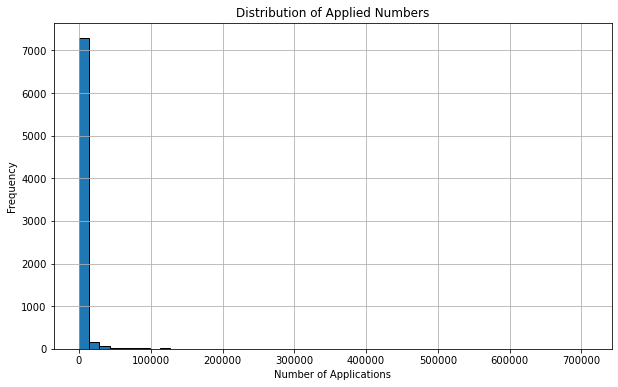

In [26]:
# Plot distribution of application numbers for each pair
plt.figure(figsize=(10, 6))
plt.hist(pairs['applied'], bins=50, edgecolor='black')
plt.title('Distribution of Applied Numbers')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# Distribution seems quite skewed left
# Examine basic statistics to better understand the distribution
print(f"Mean: {pairs['applied'].mean()}")
print(f"Median: {pairs['applied'].median()}")
print(f"Maximum: {pairs['applied'].max()}")
print(f"Minimum: {pairs['applied'].min()}")

Mean: 3204.477986594822
Median: 65.0
Maximum: 706895
Minimum: 5


In [28]:
# Clean up column names for visualization and extract the highest 10 observations
pairs.rename(columns={"Country of origin" : "Country of Origin", "Country of asylum" : "Country of Asylum","applied" : "Asylum Applicants"}, inplace=True)
highest_10 = pairs.head(10)
highest_10

,"Origin, Destination",Country of Origin,Country of origin (ISO),Country of Asylum,Country of asylum (ISO),Asylum Applicants
6491,"(Syrian Arab Rep., Germany)",Syrian Arab Rep.,SYR,Germany,DEU,706895
7598,"(Zimbabwe, South Africa)",Zimbabwe,ZWE,South Africa,ZAF,617935
7350,"(Venezuela (Bolivarian Republic of), Peru)",Venezuela (Bolivarian Republic of),VEN,Peru,PER,537870
7083,"(Ukraine, Russian Federation)",Ukraine,UKR,Russian Federation,RUS,472767
4523,"(Myanmar, Malaysia)",Myanmar,MMR,Malaysia,MYS,333882
101,"(Afghanistan, Turkey)",Afghanistan,AFG,Turkey,TUR,327441
3332,"(Iraq, Germany)",Iraq,IRQ,Germany,DEU,318349
35,"(Afghanistan, Germany)",Afghanistan,AFG,Germany,DEU,301487
5712,"(Serbia and Kosovo: S/RES/1244 (1999), Germany)",Serbia and Kosovo: S/RES/1244 (1999),SRB,Germany,DEU,293237
4340,"(Mexico, United States of America)",Mexico,MEX,United States of America,USA,286965


In [29]:
# Create bubble chart of 10 highest origin-destination country pairs from 2000-2020
fig = px.scatter(highest_10, x='Country of Asylum', y='Country of Origin',
	         size='Asylum Applicants', color="Country of Origin",
                 hover_name="Asylum Applicants", log_x=False, size_max=60)
fig.show()